# Football Players Performance Analytics in top 5 leagues in Europe

### Step 1. Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

/Users/macy/.virtual-envs/ml-venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Step 2. Loading & Exploring the Dataset

In [2]:
football_df = pd.read_csv('datasets/football_player_stats.csv', sep=';', encoding='latin-1')
football_df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


In [3]:
football_df.describe(include='all')

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,2689.000000,2689,2688,2689,2689,2689,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.00000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.00000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.00000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000
unique,NaN,2530,104,10,98,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ionu? Radu,ESP,DF,Cádiz,Ligue 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,370,825,34,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1345.000000,NaN,NaN,NaN,NaN,NaN,26.011157,1996.155820,11.833023,8.476013,760.451097,8.450465,1.027520,1.245787,0.411261,24.222164,0.064210,0.167374,1

In [4]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Columns: 124 entries, Rk to AerWon%
dtypes: float64(112), int64(7), object(5)
memory usage: 2.5+ MB


### Step 3: Data Wrangling

In [5]:
football_df.isnull().sum()

Rk               0
Player           0
Nation           1
Pos              0
Squad            0
Comp             0
Age              0
Born             0
MP               0
Starts           0
Min              0
90s              0
Goals            0
Shots            0
SoT              0
SoT%             0
G/Sh             0
G/SoT            0
ShoDist          0
ShoFK            0
ShoPK            0
PKatt            0
PasTotCmp        0
PasTotAtt        0
PasTotCmp%       0
PasTotDist       0
PasTotPrgDist    0
PasShoCmp        0
PasShoAtt        0
PasShoCmp%       0
PasMedCmp        0
PasMedAtt        0
PasMedCmp%       0
PasLonCmp        0
PasLonAtt        0
PasLonCmp%       0
Assists          0
PasAss           0
Pas3rd           0
PPA              0
CrsPA            0
PasProg          0
PasAtt           0
PasLive          0
PasDead          0
PasFK            0
TB               0
Sw               0
PasCrs           0
TI               0
CK               0
CkIn             0
CkOut       

In [6]:
# Checking duplicates

football_df.duplicated().sum()

np.int64(0)

In [7]:
# Transforming the columns to lower case
football_df.columns = football_df.columns.str.lower()

#### 3.1 High level report
There are 124 columns in the dataset made up of basic station information, cell-level data, energy consumption data defined on the first cell in the notebook.

There are 2689 rows in the datasets without any duplicates and 1 missing value under the Nation column

#### 3.2 Generate ydata profile to uncover more insights

In [8]:
profile = ProfileReport(football_df, title='Top Football Player League Performance Analysis')
#profile.to_file(output_file='profile-report.html')

#### 3.3 Data Cleaning 
Insert the country of the missing data on the Nation column

In [9]:
football_df[football_df.nation.isnull()]

,rk,player,nation,pos,squad,comp,age,born,mp,starts,min,90s,goals,shots,sot,sot%,g/sh,g/sot,shodist,shofk,shopk,pkatt,pastotcmp,pastotatt,pastotcmp%,pastotdist,pastotprgdist,passhocmp,passhoatt,passhocmp%,pasmedcmp,pasmedatt,pasmedcmp%,pasloncmp,paslonatt,pasloncmp%,assists,pasass,pas3rd,ppa,crspa,pasprog,pasatt,paslive,pasdead,pasfk,tb,sw,pascrs,ti,ck,ckin,ckout,ckstr,pascmp,pasoff,pasblocks,sca,scapasslive,scapassdead,scadrib,scash,scafld,scadef,gca,gcapasslive,gcapassdead,gcadrib,gcash,gcafld,gcadef,tkl,tklwon,tkldef3rd,tklmid3rd,tklatt3rd,tkldri,tkldriatt,tkldri%,tkldripast,blocks,blksh,blkpass,int,tkl+int,clr,err,touches,toudefpen,toudef3rd,toumid3rd,touatt3rd,touattpen,toulive,toatt,tosuc,tosuc%,totkl,totkl%,carries,cartotdist,carprgdist,carprog,car3rd,cpa,carmis,cardis,rec,recprog,crdy,crdr,2crdy,fls,fld,off,crs,tklw,pkwon,pkcon,og,recov,aerwon,aerlost,aerwon%
1875,1876,David Ozoh,NaN,FW,Crystal Palace,Premier League,17,2005,1,0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,100.0,24.0,0.0,3.0,3.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
football_df[football_df.nation.isnull()].nation.fillna('England')

1875    England
Name: nation, dtype: object

#### 3.4 Data Analysis and Exploration

We'll analyze players who played more than 450 minutes which is equivalent to 5 games in a season

In [11]:
football_df.shape

(2689, 124)

In [12]:
football_df = football_df[football_df['min'] > 450]
football_df.shape

(1624, 124)

In [13]:
football_df.sort_values(by='min', ascending=False).head()

,rk,player,nation,pos,squad,comp,age,born,mp,starts,min,90s,goals,shots,sot,sot%,g/sh,g/sot,shodist,shofk,shopk,pkatt,pastotcmp,pastotatt,pastotcmp%,pastotdist,pastotprgdist,passhocmp,passhoatt,passhocmp%,pasmedcmp,pasmedatt,pasmedcmp%,pasloncmp,paslonatt,pasloncmp%,assists,pasass,pas3rd,ppa,crspa,pasprog,pasatt,paslive,pasdead,pasfk,tb,sw,pascrs,ti,ck,ckin,ckout,ckstr,pascmp,pasoff,pasblocks,sca,scapasslive,scapassdead,scadrib,scash,scafld,scadef,gca,gcapasslive,gcapassdead,gcadrib,gcash,gcafld,gcadef,tkl,tklwon,tkldef3rd,tklmid3rd,tklatt3rd,tkldri,tkldriatt,tkldri%,tkldripast,blocks,blksh,blkpass,int,tkl+int,clr,err,touches,toudefpen,toudef3rd,toumid3rd,touatt3rd,touattpen,toulive,toatt,tosuc,tosuc%,totkl,totkl%,carries,cartotdist,carprgdist,carprog,car3rd,cpa,carmis,cardis,rec,recprog,crdy,crdr,2crdy,fls,fld,off,crs,tklw,pkwon,pkcon,og,recov,aerwon,aerlost,aerwon%
1805,1806,Alexander Nübel,GER,GK,Monaco,Ligue 1,26,1996,23,23,2070,23.0,0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.4,30.1,74.6,682.2,507.9,3.13,3.17,98.6,9.3,9.52,97.7,9.91,17.30,57.3,0.00,0.04,0.09,0.00,0.0,0.00,30.1,20.6,9.48,2.35,0.0,0.09,0.00,0.00,0.0,0.0,0.0,0.0,22.4,0.00,0.00,0.35,0.26,0.09,0.00,0.00,0.0,0.00,0.04,0.04,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.0,0.04,0.00,0.00,0.00,0.04,0.04,0.22,0.09,32.1,26.60,31.9,0.22,0.00,0.00,32.1,0.00,0.00,0.0,0.00,0.0,22.2,112.9,66.7,0.00,0.00,0.0,0.04,0.00,12.6,0.00,0.09,0.0,0.0,0.00,0.04,0.00,0.00,0.00,0.0,0.00,0.0,1.22,0.17,0.04,80.0
724,725,Gianluigi Donnarumma,ITA,GK,Paris S-G,Ligue 1,23,1999,23,23,2070,23.0,0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.5,25.9,87.1,450.1,292.9,7.00,7.04,99.4,11.7,12.00,97.5,3.26,6.26,52.1,0.00,0.00,0.00,0.00,0.0,0.00,25.9,19.4,6.43,1.22,0.0,0.04,0.00,0.00,0.0,0.0,0.0,0.0,22.5,0.00,0.00,0.04,0.04,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.0,0.04,0.00,0.00,0.00,0.00,0.00,0.30,0.04,27.6,24.60,27.4,0.26,0.00,0.00,27.6,0.00,0.00,0.0,0.00,0.0,19.5,89.0,54.3,0.00,0.04,0.0,0.00,0.00,12.8,0.00,0.09,0.0,0.0,0.00,0.04,0.00,0.00,0.00,0.0,0.00,0.0,1.48,0.22,0.04,83.3
679,680,Mory Diaw,SEN,GK,Clermont Foot,Ligue 1,29,1993,23,23,2070,23.0,0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,25.7,37.4,68.8,773.6,572.5,4.04,4.09,98.9,11.3,11.80,95.9,10.10,21.20,47.7,0.00,0.09,0.91,0.09,0.0,0.00,37.4,25.6,11.70,4.52,0.0,0.22,0.00,0.00,0.0,0.0,0.0,0.0,25.7,0.09,0.00,0.17,0.13,0.04,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.0,0.09,0.00,0.00,0.00,0.09,0.09,0.39,0.13,40.2,32.90,40.0,0.26,0.00,0.00,40.2,0.00,0.00,0.0,0.00,0.0,26.0,147.3,96.9,0.00,0.00,0.0,0.00,0.00,16.2,0.00,0.00,0.0,0.0,0.00,0.09,0.00,0.00,0.00,0.0,0.00,0.0,1.04,0.17,0.00,100.0
2604,2605,Mateusz Wieteska,POL,DF,Clermont Foot,Ligue 1,26,1997,23,23,2069,23.0,0,0.48,0.17,36.4,0.00,0.0,9.7,0.0,0.0,0.0,38.3,46.7,82.1,700.0,294.8,15.20,17.00,89.3,19.1,21.70,87.8,3.30,6.52,50.7,0.04,0.13,2.83,0.09,0.0,3.00,46.7,44.1,2.30,1.35,0.0,0.17,0.04,0.91,0.0,0.0,0.0,0.0,38.3,0.22,0.39,0.57,0.39,0.00,0.04,0.13,0.0,0.00,0.09,0.00,0.0,0.0,0.09,0.0,0.0,1.22,0.70,0.78,0.43,0.00,0.52,0.91,57.1,0.39,1.26,0.74,0.52,1.57,2.78,3.00,0.09,55.6,7.13,28.5,25.80,1.78,0.87,55.6,0.22,0.17,80.0,0.00,0.0,38.7,230.2,127.5,0.48,0.30,0.0,0.35,0.13,34.9,0.26,0.17,0.0,0.0,0.57,0.70,0.00,0.04,0.70,0.0,0.04,0.0,4.96,1.87,1.35,58.1
2052,2053,Tim Ream,USA,DF,Fulham,Premier League,35,1987,23,23,2067,23.0,1,0.13,0.09,66.7,0.33,0.5,9.8,0.0,0.0,0.0,49.2,57.0,86.3,1075.5,375.2,11.50,13.20,87.1,28.8,31.00,93.0,8.48,11.90,71.4,0.00,0.04,3.70,0.00,0.0,3.52,57.0,55.2,1.65,1.09,0.0,0.87,0.17,0.35,0.0,0.0,0.0,0.0,49.2,0.09,0.13,0.83,0.78,0.00,0.00,0.00,0.0,0.04,0.00,0.00,0.0,0.0,0.00,0.0,0.0,1.00,0.52,0.48,0.39,0.13,0.30,0.70,43.8,0.39,1.39,0.83,0.57,1.52,2.52,3.39,0.00,65.7,9.13,34.3,29.70,2.13,0.52,65.7,0.43,0.30,70.0,0.04,10.0,40.1,228.9,155.6,0.78,0.35,0.0,0.52,0.13,42.6,0.04,0.09,0.0,0.0,0.48,0.26,0.04,0.17,0.52,0.0,0.00,0.0,6.26,1.26,0.78,61.7


#### 3.4.1 Which team has collectively scored the most goals in each of the leagues?

In [14]:
# unique leagues in the dataset
football_df.comp.nunique(), football_df.comp.unique()

(5,
 array(['Premier League', 'Ligue 1', 'Serie A', 'La Liga', 'Bundesliga'],
       dtype=object))

In [15]:
goals_dist = football_df.groupby(['comp', 'squad'])['goals'].sum().reset_index().sort_values(by=['goals'], ascending=False)
goals_dist.head(15)

,comp,squad,goals
1,Bundesliga,Bayern Munich,55
70,Premier League,Manchester City,52
52,Ligue 1,Paris S-G,50
90,Serie A,Napoli,48
48,Ligue 1,Monaco,46
21,La Liga,Barcelona,41
58,Premier League,Arsenal,40
75,Premier League,Tottenham,40
32,La Liga,Real Madrid,38
12,Bundesliga,RB Leipzig,37


In [16]:
# Plot a graph to show the top 3 scoring teams/league

#### 3.4.2 Who scored the most goals across the leagues?

In [17]:
top_scorers = football_df.groupby(['comp', 'player'])['goals'].sum().reset_index().sort_values(by=['goals'], ascending=False)
top_scorers.head()

,comp,player,goals
1048,Premier League,Erling Haaland,25
1062,Premier League,Harry Kane,17
1610,Serie A,Victor Osimhen,16
1074,Premier League,Ivan Toney,14
940,Ligue 1,Wissam Ben Yedder,14


In [18]:
football_df.pos.unique()

array(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'GK', 'DFFW', 'DFMF', 'MFDF',
       'FWDF'], dtype=object)

In [19]:
# Who was the most prolific across the league - shots leading to goals
prolific_scorers = football_df[football_df['pos'] == 'FW'].groupby(['comp', 'player', 'goals', 'pos', 'mp','min'])['g/sot'].sum().reset_index().sort_values(by=['g/sot', 'min'], ascending=False)
prolific_scorers.head()

,comp,player,goals,pos,mp,min,g/sot
31,Bundesliga,Steffen Tigges,5,FW,16,952,0.83
127,Premier League,Crysencio Summerville,4,FW,14,673,0.80
10,Bundesliga,Jonas Wind,4,FW,11,561,0.80
168,Serie A,Assan Ceesay,3,FW,18,929,0.75
86,Ligue 1,Breel Embolo,12,FW,23,1542,0.71


#### 3.4.3 Which leagues should one watch/avoid to see the most goals?

#### 3.4.4 What's the average number of minutes played in the season for all players in each league?

#### 3.4.5 Is there a correlation between age and minutes played?

### Step 4 - Create a machine learning model to predict minutes played based on age

In [20]:
football_df.head()

,rk,player,nation,pos,squad,comp,age,born,mp,starts,min,90s,goals,shots,sot,sot%,g/sh,g/sot,shodist,shofk,shopk,pkatt,pastotcmp,pastotatt,pastotcmp%,pastotdist,pastotprgdist,passhocmp,passhoatt,passhocmp%,pasmedcmp,pasmedatt,pasmedcmp%,pasloncmp,paslonatt,pasloncmp%,assists,pasass,pas3rd,ppa,crspa,pasprog,pasatt,paslive,pasdead,pasfk,tb,sw,pascrs,ti,ck,ckin,ckout,ckstr,pascmp,pasoff,pasblocks,sca,scapasslive,scapassdead,scadrib,scash,scafld,scadef,gca,gcapasslive,gcapassdead,gcadrib,gcash,gcafld,gcadef,tkl,tklwon,tkldef3rd,tklmid3rd,tklatt3rd,tkldri,tkldriatt,tkldri%,tkldripast,blocks,blksh,blkpass,int,tkl+int,clr,err,touches,toudefpen,toudef3rd,toumid3rd,touatt3rd,touattpen,toulive,toatt,tosuc,tosuc%,totkl,totkl%,carries,cartotdist,carprgdist,carprog,car3rd,cpa,carmis,cardis,rec,recprog,crdy,crdr,2crdy,fls,fld,off,crs,tklw,pkwon,pkcon,og,recov,aerwon,aerlost,aerwon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


#### 4.1 Feature Selection

In [21]:
selected_cols = ['pos', 'age', 'mp', 'starts', 'min', 'shots', 'shodist', 'shofk', 'pastotcmp', 'pastotatt', 'pastotdist', 'pastotprgdist', 'passhocmp', 'passhoatt', 'pasmedcmp', 'pasmedatt', 'paslonatt', 'assists', 'pasass', 'pas3rd', 'blocks', 'touches', 'recov', 'aerwon', 'aerlost','tkl']
selected_df = football_df[selected_cols]
selected_df.shape

(1624, 26)

In [22]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1624 entries, 0 to 2688
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pos            1624 non-null   object 
 1   age            1624 non-null   int64  
 2   mp             1624 non-null   int64  
 3   starts         1624 non-null   int64  
 4   min            1624 non-null   int64  
 5   shots          1624 non-null   float64
 6   shodist        1624 non-null   float64
 7   shofk          1624 non-null   float64
 8   pastotcmp      1624 non-null   float64
 9   pastotatt      1624 non-null   float64
 10  pastotdist     1624 non-null   float64
 11  pastotprgdist  1624 non-null   float64
 12  passhocmp      1624 non-null   float64
 13  passhoatt      1624 non-null   float64
 14  pasmedcmp      1624 non-null   float64
 15  pasmedatt      1624 non-null   float64
 16  paslonatt      1624 non-null   float64
 17  assists        1624 non-null   float64
 18  pasass       

#### 4.2 Feature Engineering

In [23]:
selected_df.pos.unique()

array(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'GK', 'DFFW', 'DFMF', 'MFDF',
       'FWDF'], dtype=object)

#### 4.2.1 Encode the categorical column - pos

In [24]:
le = LabelEncoder()
selected_df['pos'] = le.fit_transform(selected_df['pos'])
selected_df.pos.unique()

/var/folders/mk/pdjmq76j5h1b0nv4v9ys81cr0000gn/T/ipykernel_82430/3792222613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['pos'] = le.fit_transform(selected_df['pos'])


array([9, 0, 7, 5, 3, 6, 1, 2, 8, 4])

#### 4.2.2 Check the correlation in the values

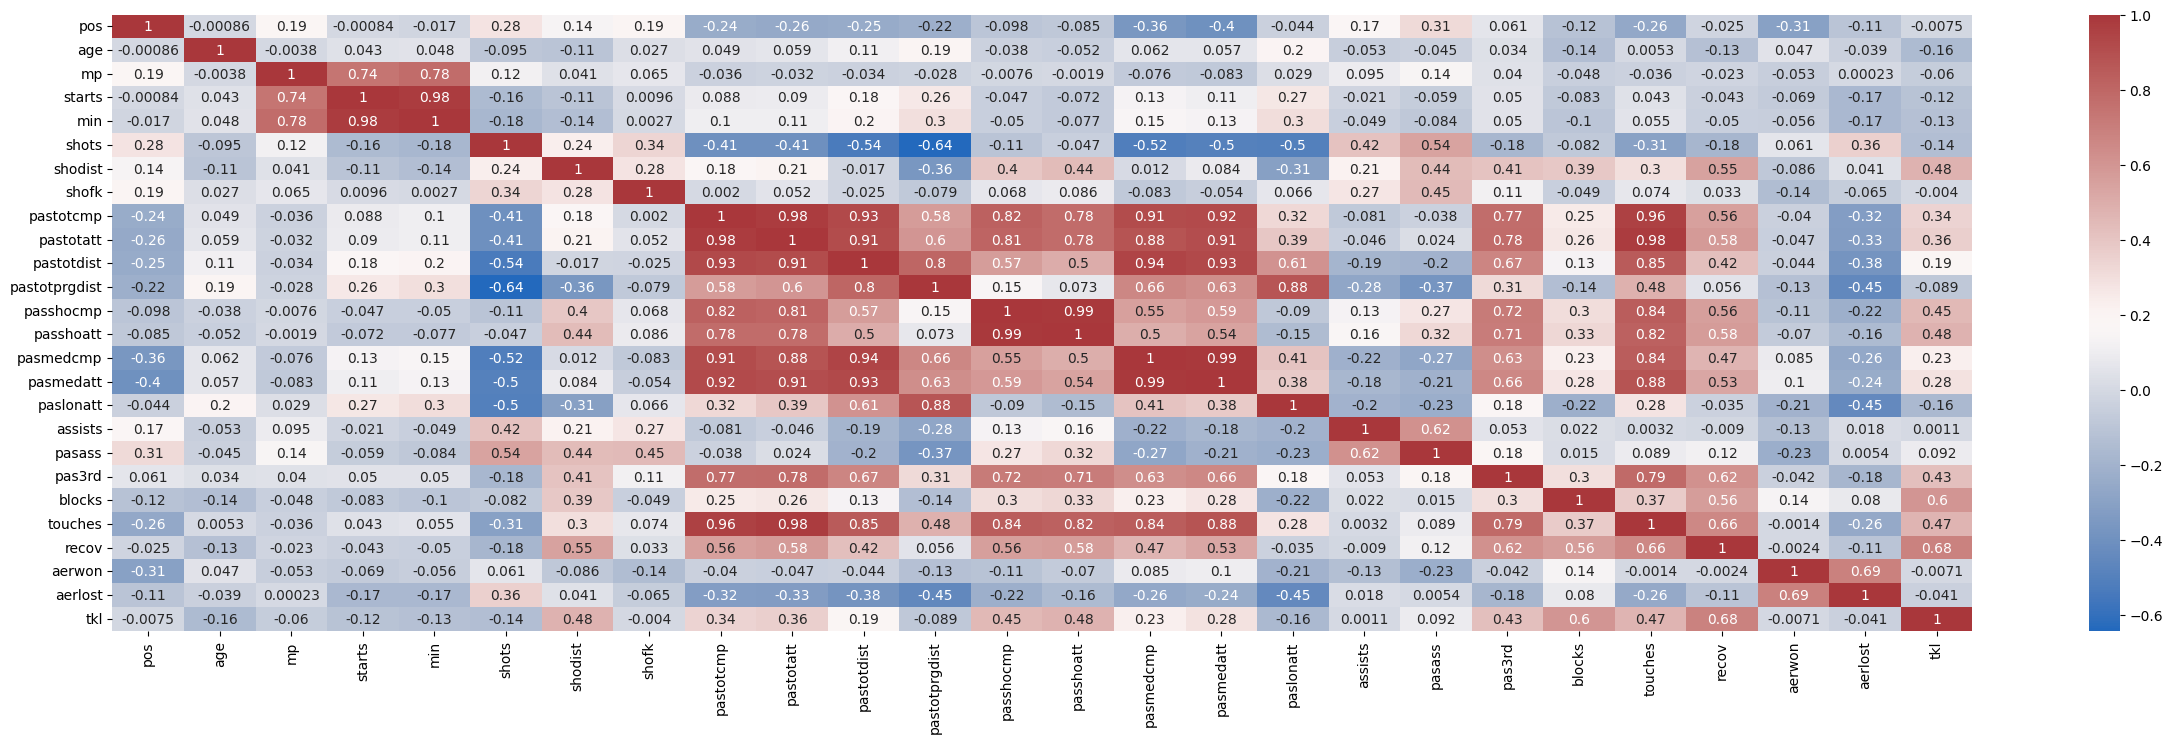

In [25]:
plt.figure(figsize=(30,8))
sns.heatmap(data = selected_df.corr(), annot=True, cmap='vlag')
plt.show()

From the heatmap, the long passes leading to attack have a higher correlation of 0.2 compared to the rest of the columns. Other columns to consider might be the total distance per pass and how those passes progress the play with 0.11 and 0.19 correlation respectively. The takcles and recoveries and shot distance have negative correlations of -0.16, -0.13 and -0.11 respectively.

The factors with a high correlation to the minutes played are mp (matches played) - 0.78, starts(matches started) - 0.98. We can also consider pastotprgdist (total distance progress per pass) - 0.3 and pastotdist (distance per pass) - (0.2), long distance pass leading to attack - (0.3). Due to a very high correlation, we can drop the starts column to reduce chances of overfitting. 

The correlation between age and the minutes played is 0.048 which seems to be a very weak positive correlation.

#### 4.2.3 Checking outliers in our dataset

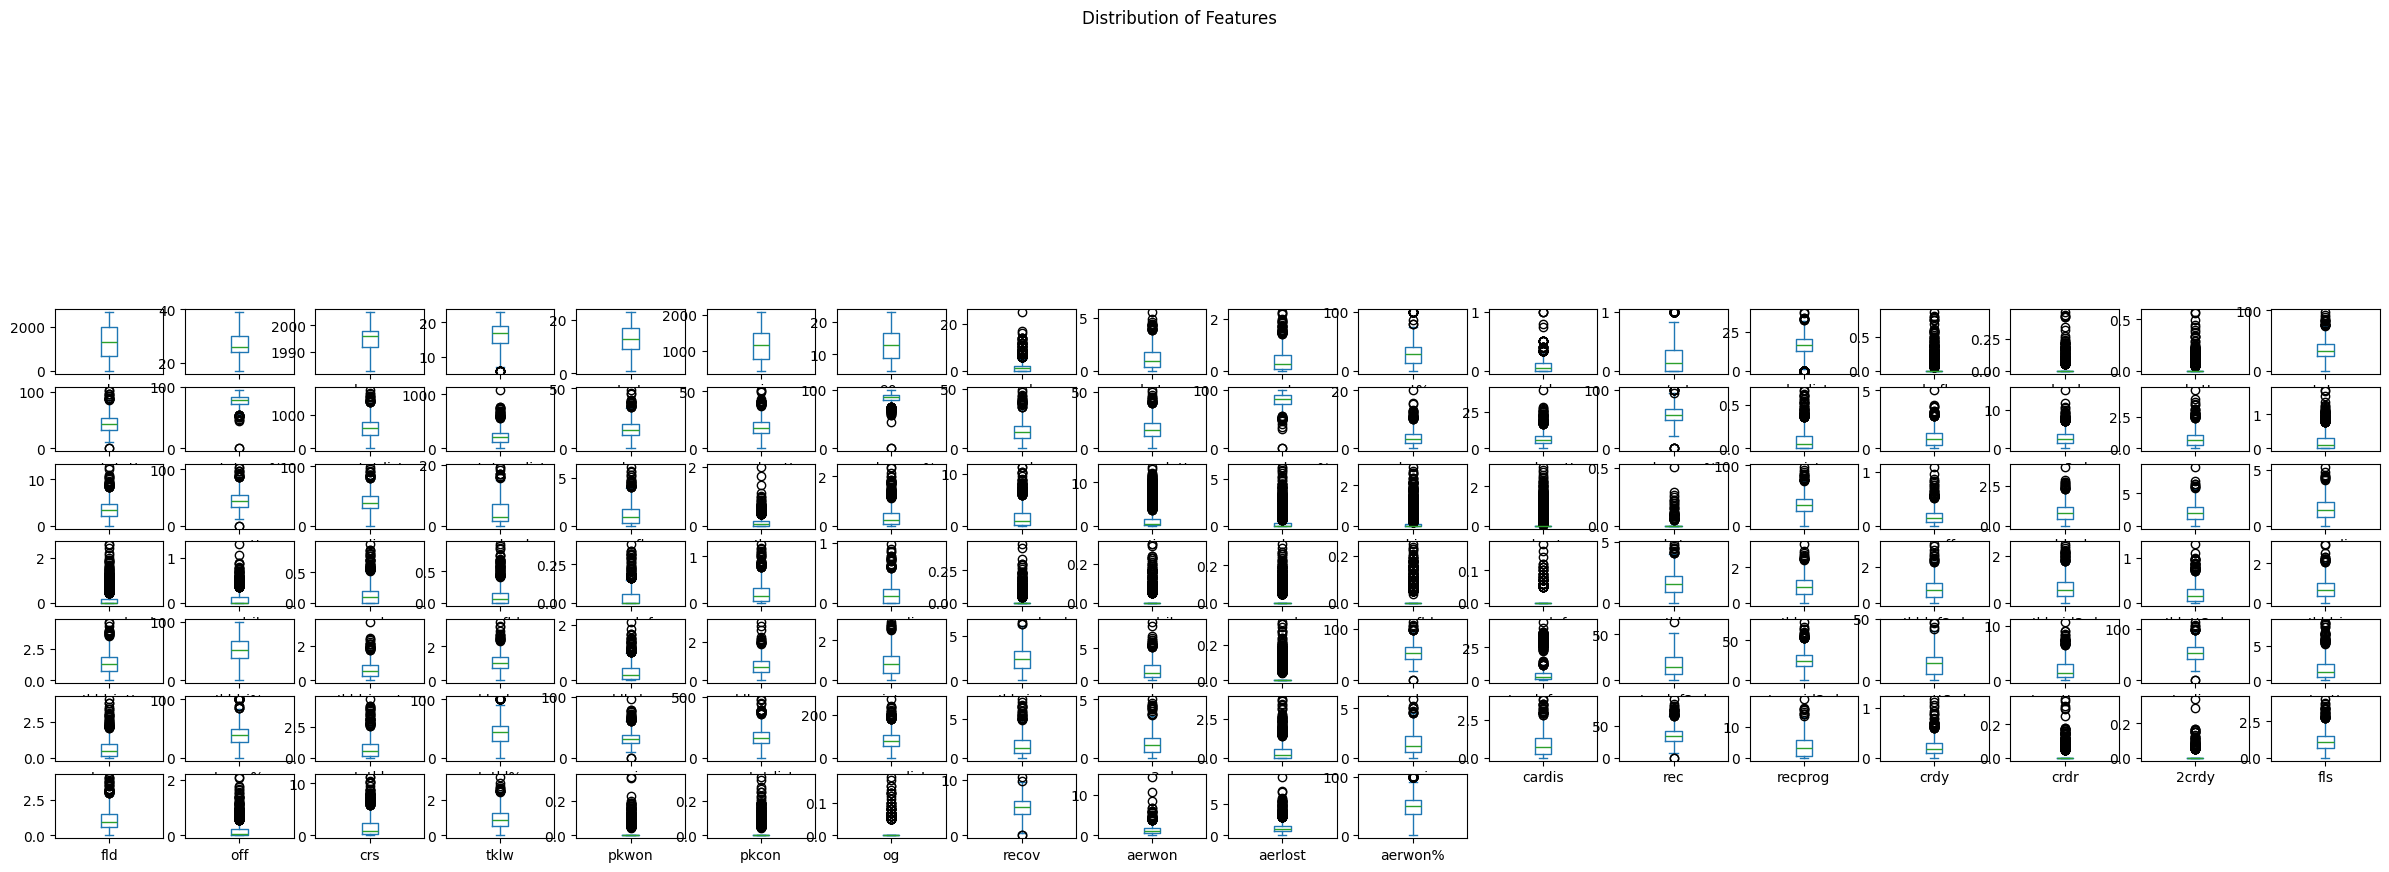

In [26]:
football_df.plot(kind ='box', subplots=True, figsize=(30,30), layout=(30,18), title='Distribution of Features')
plt.show()

#### 4.3 Training our models

#### 4.3.1 Selecting our features and target 

In [27]:
X = selected_df[['mp', 'age', 'pastotprgdist', 'pastotdist', 'paslonatt']] # Features
y = selected_df['min']

#### 4.3.2 Splitting our training and test data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### 4.3.3 Training our model and making predictions- Linear Regression 
We'll use a linear regression since minutes is a continuous value

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Making predictions
y_pred = model.predict(X_test)

#### 4.3.3 Evaluating model performance

In [31]:
# Actiual vs Predicted values
accuracy_df = pd.DataFrame({
    'Actual minutes played': y_test,
    'Predicted minutes played': y_pred,
    'Error Difference': y_test - y_pred
})
accuracy_df.head(15)

,Actual minutes played,Predicted minutes played,Error Difference
215,1800,1855.502778,-55.502778
804,927,1195.103668,-268.103668
1380,1116,1036.884019,79.115981
2006,1367,1471.674320,-104.674320
1046,1765,1431.316250,333.683750
1913,1377,1462.814079,-85.814079
2633,1392,1172.683554,219.316446
1342,1132,918.967327,213.032673
1509,634,661.571988,-27.571988
462,1710,1544.959271,165.040729


In [32]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('The Mean Squared Error: ', mse)
print('The root MSE: ', rmse)

The Mean Squared Error:  52715.71445838015
The root MSE:  229.59902974180912


In [33]:
r2_score = r2_score(y_test, y_pred)
print('The R^2 Square is: ', r2_score)

The R^2 Square is:  0.7037318164582118


The rmse and r2_score is quite low meaning our model performs well.

### Step 4 - Create a machine learning model to predict goals scored by players across a season

#### Need to convert the columns with yards to metres
1 yard = 0.9144m